In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [4]:
#defining basic variables
x=50
y=50
del_x=1
del_y=1
alpha=2
t_iter=500
del_t=0.1

In [5]:
#calculating gamma
Y=(alpha*del_t)/(del_x**2)

In [11]:
#Initializing the temperature matrix
T=np.zeros((x,y,t_iter))

#Boundary conditions:
T[x-1,:,:]=100
# T[:,y-1,:]=50
# print(T[1,:,:])

In [12]:
#defining the function to calculate T grid
def heat_flow(T):
    for k in range(0,t_iter-1,1):
        for i in range(1,x-1,1):
            for j in range(1,y-1,1):
                T[i,j,k+1]=Y*(T[i+1,j,k] + T[i-1,j,k] + T[i,j+1,k] + T[i,j-1,k] - 4*T[i,j,k]) + T[i,j,k]
    return T

In [19]:
#function to plot the variation of T
def pmap(T,k):
    plt.clf()
    plt.xlabel("y")
    plt.ylabel("x")
    plt.pcolormesh(T, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()
    return plt

In [17]:
T=heat_flow(T)

MovieWriter ffmpeg unavailable; using Pillow instead.


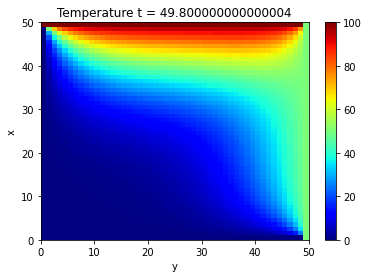

In [18]:
def animate(k):
    pmap(T[:,:,k],k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=t_iter-1, repeat=False)
anim.save("Sheet.gif")